In [11]:
import geopandas as gpd
import os 
import glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

In [47]:
with open('all_df.pkl', 'rb') as f:
    lc = pickle.load(f)

In [48]:
lc.head()

,Land_Truth,Mean_Blue,Mean_Green,Mean_nDSM,Mean_NIR,Mean_Ratio,Mean_Red,NDVI,NIR_R_diff,sd_dsm
0,Healthy Grass,76.214724,100.404908,0.266467,157.196319,1.761515,89.239264,0.275760,67.957055,1.108161
1,Trees,60.936709,64.531646,6.674799,129.050633,2.449543,52.683544,0.420213,76.367089,2.821334
2,Pavement,146.045455,162.479339,0.005762,136.404959,0.781302,174.586777,-0.122774,-38.181818,0.012323
3,Healthy Grass,73.800000,75.000000,1.081519,118.600000,1.708934,69.400000,0.261702,49.200000,0.591434
4,Pavement,126.521739,131.434783,0.544407,82.173913,0.577276,142.347826,-0.268009,-60.173913,1.059909


In [49]:
lc = lc.reset_index()
lc.head()

,index,Land_Truth,Mean_Blue,Mean_Green,Mean_nDSM,Mean_NIR,Mean_Ratio,Mean_Red,NDVI,NIR_R_diff,sd_dsm
0,0,Healthy Grass,76.214724,100.404908,0.266467,157.196319,1.761515,89.239264,0.275760,67.957055,1.108161
1,1,Trees,60.936709,64.531646,6.674799,129.050633,2.449543,52.683544,0.420213,76.367089,2.821334
2,2,Pavement,146.045455,162.479339,0.005762,136.404959,0.781302,174.586777,-0.122774,-38.181818,0.012323
3,3,Healthy Grass,73.800000,75.000000,1.081519,118.600000,1.708934,69.400000,0.261702,49.200000,0.591434
4,4,Pavement,126.521739,131.434783,0.544407,82.173913,0.577276,142.347826,-0.268009,-60.173913,1.059909


In [15]:
# read in shadows and clean
sd = gpd.read_file('West_reclass_sh.shp')
sd = sd[sd['Land_Truth'] != 'BareGrass']
sd['Land_Truth'] = sd['Land_Truth'].apply(lambda x: x.replace('HealthyGrass', 'Healthy Grass') if x == 'HealthyGrass' else x)
sd['Land_Truth'].value_counts()

Pavement         212
Healthy Grass     18
Buildings          6
Name: Land_Truth, dtype: int64

In [16]:
# match columns for both dataframes
sd = sd[['Land_Truth', 'Mean_Red', 'Mean_nDSM', 'Mean_NIR',
       'Mean_Ratio', 'NDVI', 'NIR_R_diff', 'sd_dsm']]
lc = lc[['Land_Truth', 'Mean_Red', 'Mean_nDSM', 'Mean_NIR',
       'Mean_Ratio', 'NDVI', 'NIR_R_diff', 'sd_dsm']]

In [50]:
# join
comp = sd.merge(lc, left_on='Land_Truth', right_on='Land_Truth', suffixes=('_sd', '_lc'))
comp.head()

,Land_Truth,Mean_Red_sd,Mean_nDSM_sd,Mean_NIR_sd,Mean_Ratio_sd,NDVI_sd,NIR_R_diff_sd,sd_dsm_sd,index,Mean_Blue,Mean_Green,Mean_nDSM_lc,Mean_NIR_lc,Mean_Ratio_lc,Mean_Red_lc,NDVI_lc,NIR_R_diff_lc,sd_dsm_lc
0,Pavement,61.75,0.009974,46.625,0.755061,-0.139562,-15.125,0.030438,2,146.045455,162.479339,0.005762,136.404959,0.781302,174.586777,-0.122774,-38.181818,0.012323
1,Pavement,61.75,0.009974,46.625,0.755061,-0.139562,-15.125,0.030438,4,126.521739,131.434783,0.544407,82.173913,0.577276,142.347826,-0.268009,-60.173913,1.059909
2,Pavement,61.75,0.009974,46.625,0.755061,-0.139562,-15.125,0.030438,8,165.810811,179.864865,0.291689,145.378378,0.804036,180.810811,-0.108625,-35.432432,0.374888
3,Pavement,61.75,0.009974,46.625,0.755061,-0.139562,-15.125,0.030438,13,147.018182,157.327273,0.196154,114.436364,0.699878,163.509091,-0.176555,-49.072727,0.841381
4,Pavement,61.75,0.009974,46.625,0.755061,-0.139562,-15.125,0.030438,15,113.571429,114.857143,0.254674,82.571429,0.743887,111.000000,-0.146863,-28.428571,0.288282


Text(0.5, 1.0, 'Full Reflectance Red')

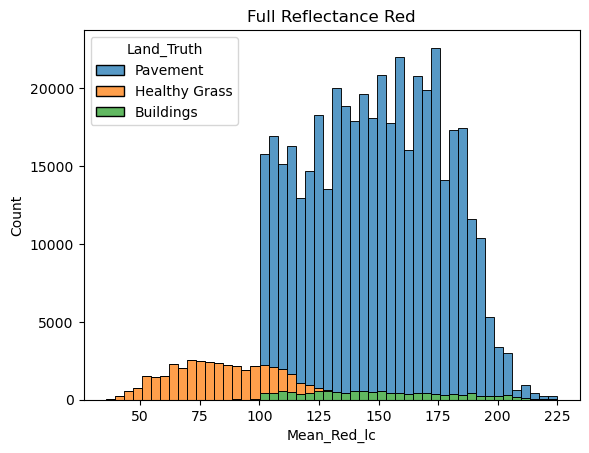

In [29]:
sns.histplot(data=comp, x=comp['Mean_Red_lc'], bins=50, hue='Land_Truth', multiple='stack')
plt.title('Full Reflectance Red')

Text(0.5, 1.0, 'Sub Reflectance Red')

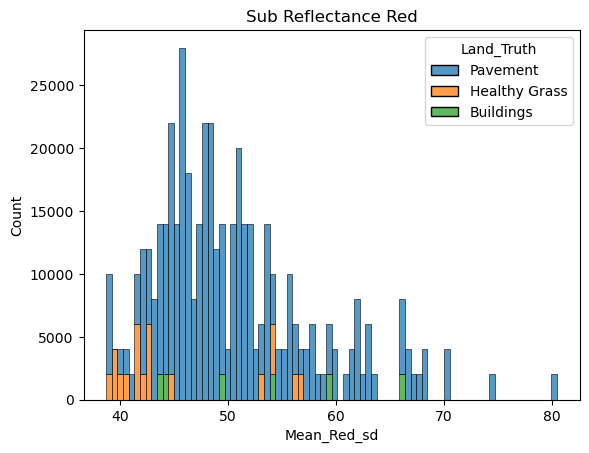

In [31]:
sns.histplot(data=comp, x=comp['Mean_Red_sd'], bins=80, hue='Land_Truth', multiple='stack')
plt.title('Sub Reflectance Red')

<AxesSubplot: xlabel='Land_Truth', ylabel='NDVI_sd'>

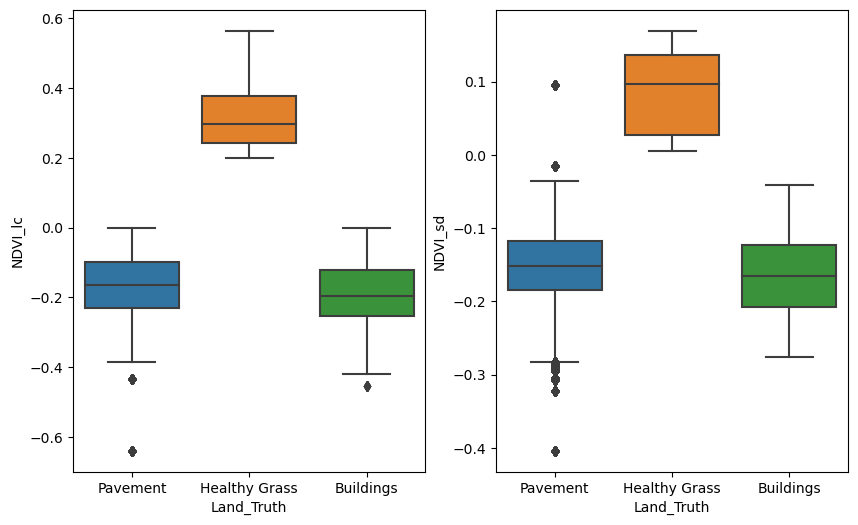

In [40]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
sns.boxplot(data=comp, x='Land_Truth', y='NDVI_lc', ax=ax1)
sns.boxplot(data=comp, x='Land_Truth', y='NDVI_sd', ax=ax2)

<AxesSubplot: xlabel='Land_Truth', ylabel='Mean_nDSM_sd'>

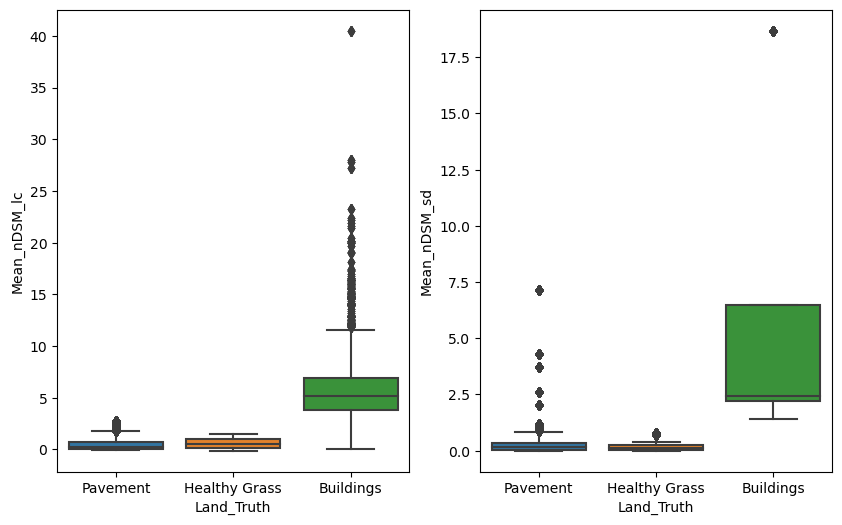

In [41]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
sns.boxplot(data=comp, x='Land_Truth', y='Mean_nDSM_lc', ax=ax1)
sns.boxplot(data=comp, x='Land_Truth', y='Mean_nDSM_sd', ax=ax2)

<AxesSubplot: xlabel='Land_Truth', ylabel='Mean_Red_sd'>

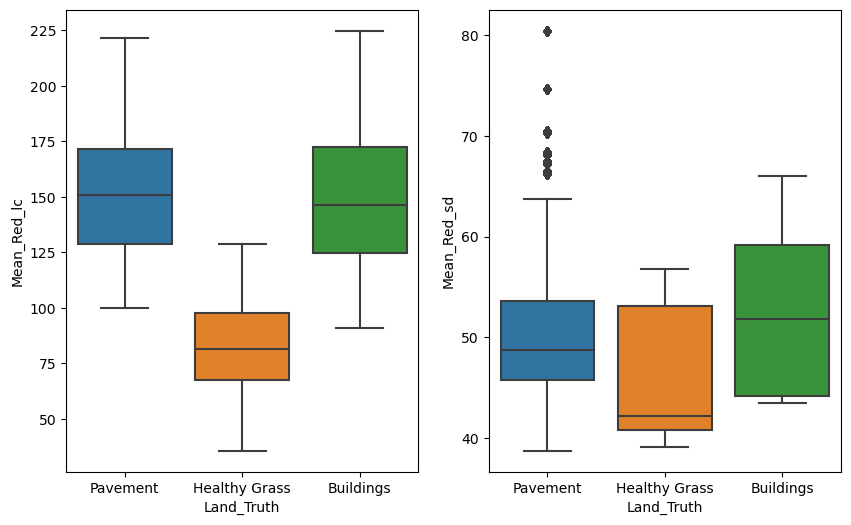

In [63]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
sns.boxplot(data=comp, x='Land_Truth', y='Mean_Red_lc', ax=ax1)
sns.boxplot(data=comp, x='Land_Truth', y='Mean_Red_sd', ax=ax2)

<AxesSubplot: xlabel='Land_Truth', ylabel='Mean_NIR_sd'>

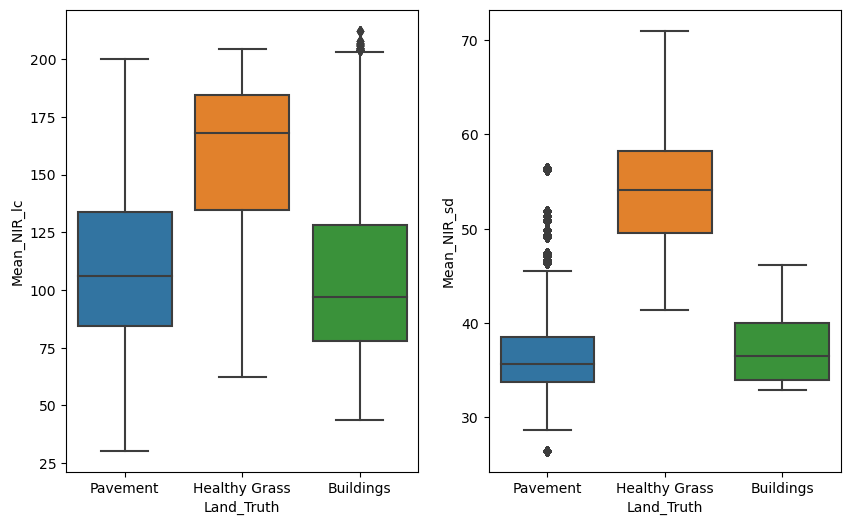

In [64]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
sns.boxplot(data=comp, x='Land_Truth', y='Mean_NIR_lc', ax=ax1)
sns.boxplot(data=comp, x='Land_Truth', y='Mean_NIR_sd', ax=ax2)

Text(0.5, 1.0, 'Full Reflectance NDVI Values')

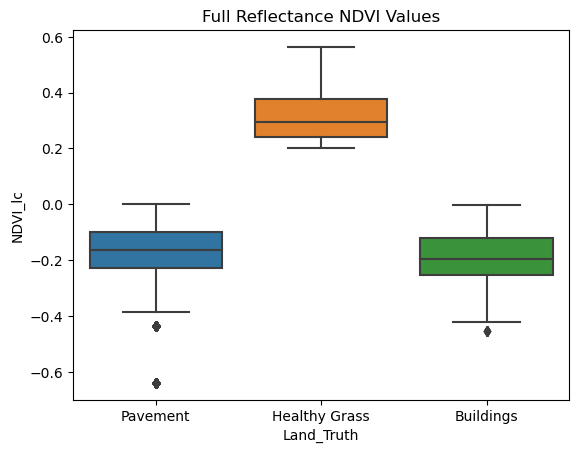

In [34]:
sns.boxplot(data=comp, x='Land_Truth', y='NDVI_lc')
plt.title('Full Reflectance NDVI Values')